
**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Mini-project 6.3 Applying supervised learning to predict student dropout rate

**Welcome to your Mini-project: Applying supervised learning to predict student dropout rate!**

In this project, we will examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

Please set aside approximately **12 hours** to complete the mini-project.

<br></br>

## **Business context**
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment. Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.
Study Group has provided you a course-level data set.


<br></br>

## **Objective**
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms - XGBoost and neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data set
- preprocess the data and conduct feature engineering
- predict dropout using XGBoost, and neural network-based model
- Identify the most important predictors of dropout.


You will also write a report summarising the results of your findings and recommendations.

<br></br>

## **Assessment criteria**
By completing this project, you will be able to provide evidence that you can:
- develop accurate predictions across diverse organisational scenarios by building and testing advanced machine learning models
- inform data-driven decision-making with advanced machine learning algorithms and models
- propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

<br></br>

## **Project guidance**

Data preparation
1. Import the required libraries and data set with the provided URL.
  - Data set drive: https://drive.google.com/drive/folders/130AVMFxTOtRiC7GOl7QmSo0I7B0iChv5
2. Read the course-level csv file and make it available as a dataframe.

3. From the dataframe, remove the following columns:

columns= ['BookingId','BookingType', 'LeadSource', 'DiscountType',
                                                    'Nationality', 'HomeCountry',
                                                    'HomeState',
                                                    'HomeCity',
                                                    'PresentCount',
                                                    'LateCount', 'AuthorisedAbsenceCount','ArrivedDate','NonCompletionReason',
                                                    'TerminationDate',
                                                    'CourseFirstIntakeDate', 'CourseStartDate','CourseEndDate',
                                                    'AcademicYear', 'CourseName',
                                                    'LearnerCode', 'ProgressionDegree',
                                                    'EligibleToProgress',
                                                    'AssessedModules',
                                                    'PassedModules',
                                                    'FailedModules',
                                                    'AttendancePercentage',
                                                    'ContactHours']

From here on, you will perform the rest of the actvities mentioned in the rubric with the smaller set of features obtained after performing the above step.

General Instructions that apply throughout this project activity:
  - Use the standard scaler to scale your numeric input features.
  - Split the data into train and test sets. Apply 80-20 split.
  - Print accuracy, confusion matrix, precision, recall and AUC on the test set
    for all your models.
  - Compare the performance (on the test set) obtained from the non-optimised
    model with the best performing model. Record your observations. What differences do you see and which metrics are improved or not improved?

## Please refer to the Rubric for specific steps to be performed as part of the project activity. Every step mentioned in the rubric will be assessed separately.

Report
1. Document your approach and major inferences from the data analysis and describe which method provided the best results and why.
  - Please ensure you include a discussion around which of the features will predict student droput.
2. When you’ve completed the project:
  - Download your completed Notebook as an IPYNB (Jupyter Notebook) or PY (Python) file. Save the file as follows: **LastName_FirstName_CAM_C201_Week_6_Mini-project**.
  - Prepare a detailed report (between 800-1,000 words) that includes:
    - an overview of your approach
    - a description of your analysis
    - an explanation of the insights you identified
    - a summary of which method gave the best results
    - an explanation of visualisations you created.
  - Save the document as a PDF named according to the following convention: **LastName_FirstName_CAM_C201_Week_6_Mini-project.pdf**.
  


<br></br>
> **Declaration**
>
> By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the Cambridge plagiarism regulations.

In [1]:
# Standard libraries (if applicable)
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, confusion_matrix, classification_report

import matplotlib.pyplot as plt

import xgboost as xgb

# TensorFlow / Keras libraries
import tensorflow as tf

from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv(r"C:\Users\okusa\Downloads\CourseLevelDatasetVersion2.csv")

In [3]:
data.head()

,CentreName,AcademicYear,LearnerCode,BookingId,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeCountry,HomeState,HomeCity,CourseLevel,CourseName,CourseFirstIntakeDate,IsFirstIntake,CourseStartDate,CourseEndDate,CompletedCourse,NonCompletionReason,ArrivedDate,TerminationDate,AssessedModules,PassedModules,FailedModules,CreditWeightedAverage,ProgressionDegree,ProgressionUniversity,EligibleToProgress,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage
0,ISC_Aberdeen,2019/20,2284932,31261386,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,China PRC,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,26/05/2020,True,26/05/2020,28/08/2020,Yes,NaN,26/05/2020,NaN,4.0,4.0,0.0,75.0,Msc Econ Accounting and Investment Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,ISC_Aberdeen,2019/20,2399500,31979379,Agent,Standard Agent Booking,NaN,12/02/1998,Male,Chinese,China PRC,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,02/09/2019,False,06/01/2020,28/08/2020,Yes,NaN,13/01/2020,NaN,7.0,7.0,0.0,73.0,BSc Biological Sciences,University of Aberdeen,Yes,80.0,0.0,93.0,5.0,215.0,97.0
2,ISC_Aberdeen,2019/20,2424946,27491184,Agent,Standard Agent Booking,NaN,07/04/2000,Male,Chinese,China PRC,NaN,Chengdu,International Year Two,Business Management and Finance International ...,02/09/2019,False,06/01/2020,28/08/2020,Yes,NaN,09/01/2020,NaN,8.0,8.0,0.0,66.0,MA Finance,University of Aberdeen,Yes,88.0,0.0,92.0,6.0,226.0,97.0
3,ISC_Aberdeen,2019/20,2426583,28689190,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,China PRC,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,02/09/2019,True,02/09/2019,26/06/2020,Yes,NaN,16/09/2019,NaN,8.0,8.0,0.0,71.0,MA Business Management,University of Aberdeen,Yes,164.0,12.0,67.0,15.0,399.0,94.0
4,ISC_Aberdeen,2019/20,2434674,35141670,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,Croatia,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,26/05/2020,True,26/05/2020,28/08/2020,Yes,NaN,29/05/2020,NaN,4.0,4.0,0.0,60.0,MSc International Business Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = data.drop(columns=['BookingId', 'BookingType', 'LeadSource', 'DiscountType',
                      'Nationality', 'HomeCountry', 'HomeState', 'HomeCity',
                      'PresentCount', 'LateCount', 'AuthorisedAbsenceCount',
                      'ArrivedDate', 'NonCompletionReason', 'TerminationDate',
                      'CourseFirstIntakeDate', 'CourseStartDate', 'CourseEndDate',
                      'AcademicYear', 'CourseName', 'LearnerCode', 'ProgressionDegree',
                      'EligibleToProgress', 'AssessedModules', 'PassedModules',
                      'FailedModules', 'AttendancePercentage', 'ContactHours'])

In [5]:
df.isnull().sum()

CentreName                     0
DateofBirth                    0
Gender                         0
CourseLevel                    0
IsFirstIntake                  0
CompletedCourse                0
CreditWeightedAverage       2296
ProgressionUniversity          0
UnauthorisedAbsenceCount     208
dtype: int64

### Visualising distribution of columns with null values t0 assess impact of decision made re: null values

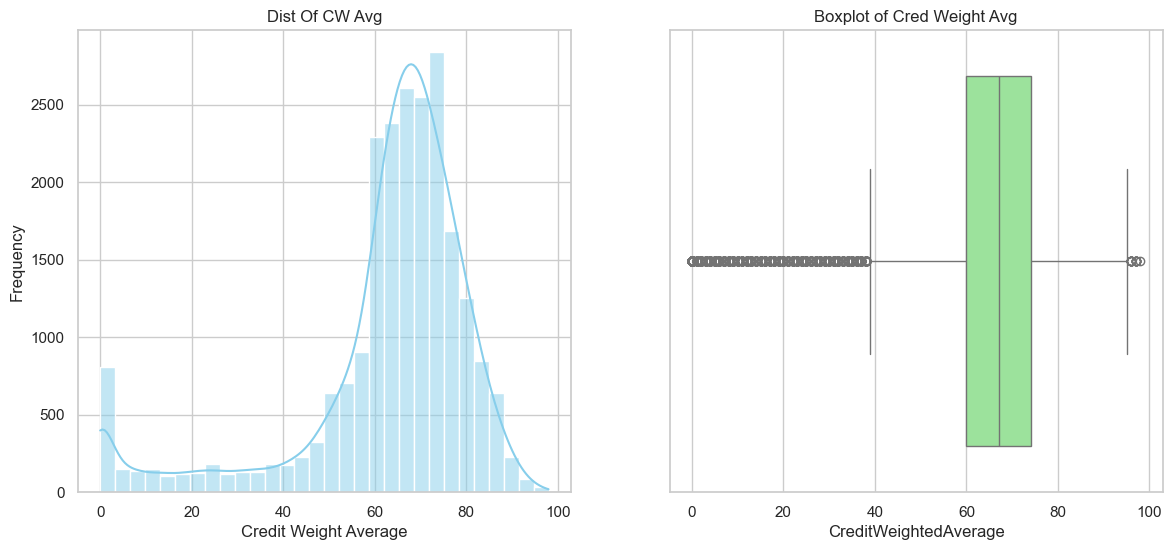

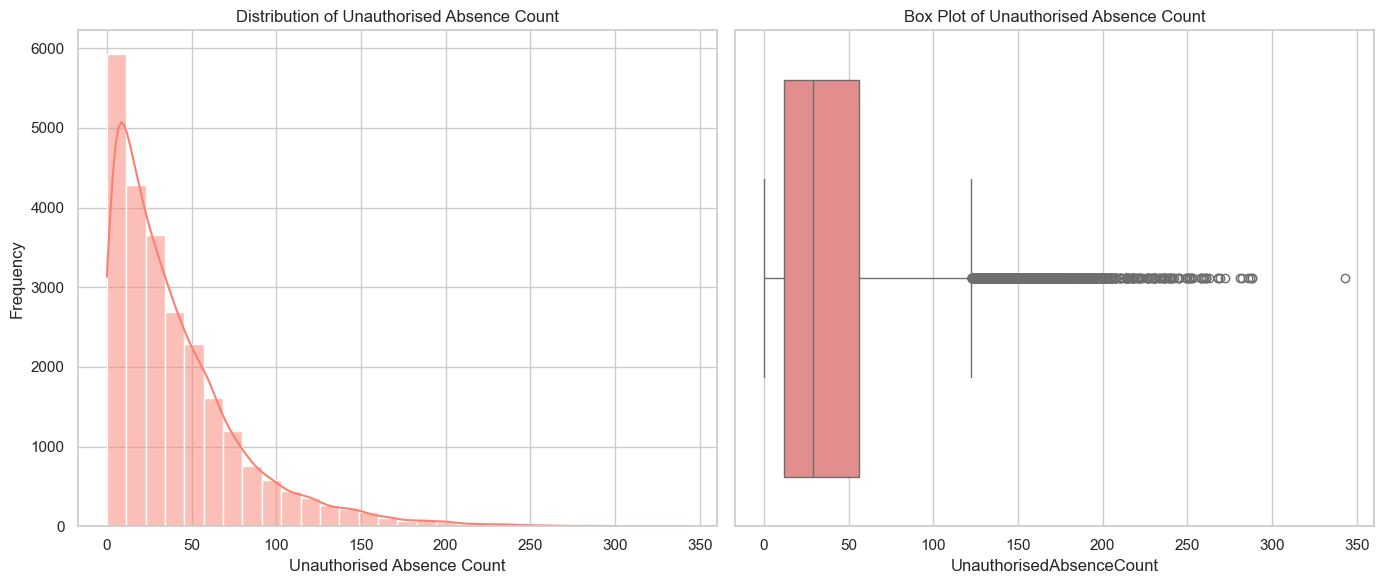

In [6]:
sns.set(style = "whitegrid")

plt.figure(figsize = (14, 6))

#Histogram and boxplot for CredWeight

plt.subplot(1,2,1)
sns.histplot(df['CreditWeightedAverage'], bins = 30, kde = True, color = 'skyblue')
plt.title('Dist Of CW Avg')
plt.xlabel('Credit Weight Average')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(x=df['CreditWeightedAverage'], color = 'lightgreen')
plt.title('Boxplot of Cred Weight Avg')

plt.tight_layout
plt.show()

# Create a figure with subplots for UnauthorisedAbsenceCount
plt.figure(figsize=(14, 6))

# Histogram and box plot for UnauthorisedAbsenceCount
plt.subplot(1, 2, 1)
sns.histplot(df['UnauthorisedAbsenceCount'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Unauthorised Absence Count')
plt.xlabel('Unauthorised Absence Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnauthorisedAbsenceCount'], color='lightcoral')
plt.title('Box Plot of Unauthorised Absence Count')

plt.tight_layout()
plt.show()



### Shape of distribution = is it skewed? are there multiple peaks ( bimodal or multimodal )

---

### Presence of outliers - points beyond the whiskers, any extreme values that may influence the mean significantly?

In [7]:
df.fillna({'CreditWeightedAverage': df['CreditWeightedAverage'].mean()}, inplace = True)
df.fillna({'UnauthorisedAbsenceCount': df['UnauthorisedAbsenceCount'].mean()}, inplace = True)

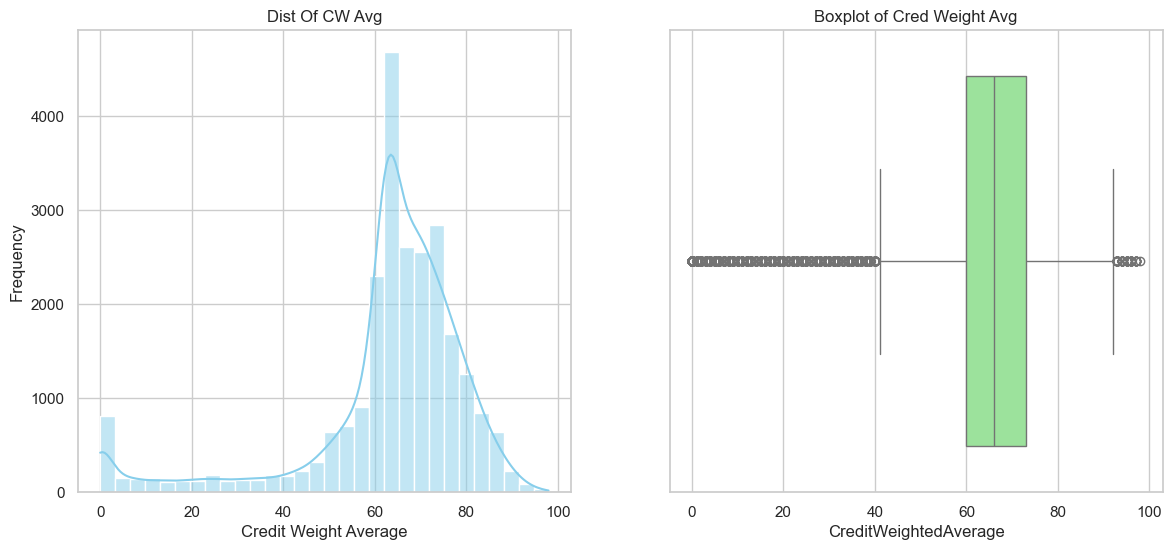

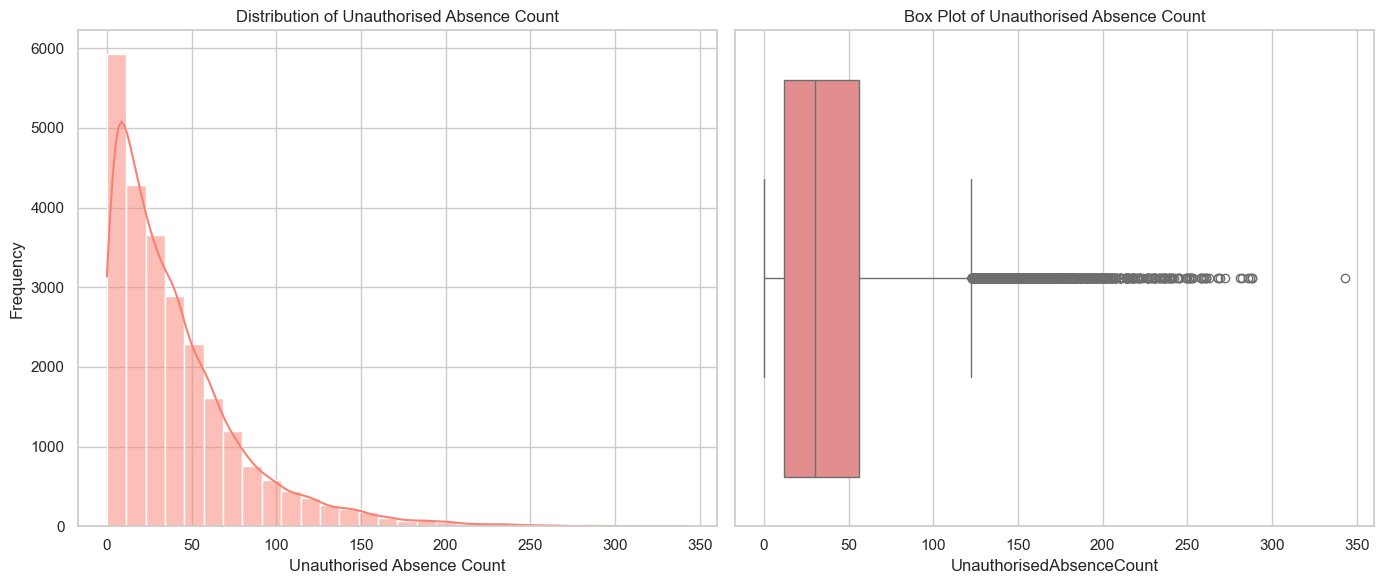

In [8]:
sns.set(style = "whitegrid")

plt.figure(figsize = (14, 6))

#Histogram and boxplot for CredWeight

plt.subplot(1,2,1)
sns.histplot(df['CreditWeightedAverage'], bins = 30, kde = True, color = 'skyblue')
plt.title('Dist Of CW Avg')
plt.xlabel('Credit Weight Average')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(x=df['CreditWeightedAverage'], color = 'lightgreen')
plt.title('Boxplot of Cred Weight Avg')

plt.tight_layout
plt.show()

# Create a figure with subplots for UnauthorisedAbsenceCount
plt.figure(figsize=(14, 6))

# Histogram and box plot for UnauthorisedAbsenceCount
plt.subplot(1, 2, 1)
sns.histplot(df['UnauthorisedAbsenceCount'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Unauthorised Absence Count')
plt.xlabel('Unauthorised Absence Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnauthorisedAbsenceCount'], color='lightcoral')
plt.title('Box Plot of Unauthorised Absence Count')

plt.tight_layout()
plt.show()

### Distribution of blue curve looks to have been impacted

In [9]:
df.head()

,CentreName,DateofBirth,Gender,CourseLevel,IsFirstIntake,CompletedCourse,CreditWeightedAverage,ProgressionUniversity,UnauthorisedAbsenceCount
0,ISC_Aberdeen,13/01/1998,Male,Pre-Masters,True,Yes,75.0,University of Aberdeen,40.491892
1,ISC_Aberdeen,12/02/1998,Male,Foundation,False,Yes,73.0,University of Aberdeen,5.000000
2,ISC_Aberdeen,07/04/2000,Male,International Year Two,False,Yes,66.0,University of Aberdeen,6.000000
3,ISC_Aberdeen,18/05/1999,Male,International Year Two,True,Yes,71.0,University of Aberdeen,15.000000
4,ISC_Aberdeen,19/04/1996,Male,Pre-Masters,True,Yes,60.0,University of Aberdeen,40.491892


### Scaling Input Features and Conducting Feature Engineering (Age, Target Variable, Categorical Variables)

In [10]:
#Convert date of birth to date time
df['DateofBirth'] = pd.to_datetime(df['DateofBirth'])

#Define function to calculate age
def calculate_age(birth):

    today = datetime.now()

    return today.year - birth.year - ((today.month, today.day) < (birth.month, birth.day)) #if the birthday has passed, result = False (0), if not = True (1)

df['Age'] = df['DateofBirth'].apply(calculate_age)

df[['Age']]

C:\Users\okusa\AppData\Local\Temp\ipykernel_7720\320238189.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateofBirth'] = pd.to_datetime(df['DateofBirth'])


,Age
0,26
1,26
2,24
3,25
4,28
...,...
25054,32
25055,29
25056,27
25057,22


In [11]:
df.columns

Index(['CentreName', 'DateofBirth', 'Gender', 'CourseLevel', 'IsFirstIntake',
       'CompletedCourse', 'CreditWeightedAverage', 'ProgressionUniversity',
       'UnauthorisedAbsenceCount', 'Age'],
      dtype='object')

### Scaling Numerical Features

In [12]:
df.dtypes

CentreName                          object
DateofBirth                 datetime64[ns]
Gender                              object
CourseLevel                         object
IsFirstIntake                         bool
CompletedCourse                     object
CreditWeightedAverage              float64
ProgressionUniversity               object
UnauthorisedAbsenceCount           float64
Age                                  int64
dtype: object

In [13]:
numerical_cols = ['CreditWeightedAverage', 'UnauthorisedAbsenceCount', 'Age']
categorical_cols = ['CentreName', 'Gender', 'CourseLevel', 'ProgressionUniversity', 'IsFirstIntake']

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
#Scaling categorical variables
df = pd.get_dummies(df, columns = categorical_cols, drop_first = True)

In [15]:
#Convert target variable to binary
df['CompletedCourse'] = df['CompletedCourse'].map({'Yes': 1, 'No': 0})

df.head()


,DateofBirth,CompletedCourse,CreditWeightedAverage,UnauthorisedAbsenceCount,Age,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,CentreName_ISC_LJMU,CentreName_ISC_Lancaster,CentreName_ISC_Leeds,CentreName_ISC_Lincoln,CentreName_ISC_London,CentreName_ISC_Online,CentreName_ISC_RHUL,CentreName_ISC_Sheffield,CentreName_ISC_Strathclyde,CentreName_ISC_Surrey,CentreName_ISC_Sussex,CentreName_ISC_Teesside,Gender_Male,CourseLevel_International Year One,CourseLevel_International Year Two,CourseLevel_Pre-Masters,ProgressionUniversity_Coventry University,ProgressionUniversity_Coventry University London,ProgressionUniversity_Durham University,ProgressionUniversity_Erasmus Rotterdam,ProgressionUniversity_HULT Business School,ProgressionUniversity_Hanze UAS,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/ Holland ISC - Tilburg University,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/ Tilburg University,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/Holland ISC - Tilburg University,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/Holland ISC - VU Amsterdam,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/Tilburg University,ProgressionUniversity_Holland ISC - Hanze UAS,ProgressionUniversity_Holland ISC - Hanze UAS/VU Amsterdam,ProgressionUniversity_Holland ISC - Tilburg University,ProgressionUniversity_Holland ISC - Tilburg University/VU Amsterdam/Hanze,ProgressionUniversity_Holland ISC - VU Amsterdam,ProgressionUniversity_Holland ISC - VU Amsterdam/ Military service,ProgressionUniversity_Keele University,ProgressionUniversity_Kingston University London,ProgressionUniversity_Lancaster University,ProgressionUniversity_Leeds Beckett University,ProgressionUniversity_Liverpool John Moores University,ProgressionUniversity_Outside of partnership,ProgressionUniversity_Royal Holloway,ProgressionUniversity_Strathclyde University,ProgressionUniversity_Teesside University,ProgressionUniversity_Tilburg University,ProgressionUniversity_UK Online Pathways,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam,IsFirstIntake_True
0,1998-01-13,1,0.662916,0.000000,0.687630,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1,1998-02-12,1,0.554533,-0.913179,0.687630,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2000-04-07,1,0.175194,-0.887450,0.056562,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,1999-05-18,1,0.446151,-0.655887,0.372096,False,False,False,False,False,Fals

In [16]:
#function to create dropped out column
def new_col(completed):
    if completed == 1:
        return 0 #Not dropped out
    else:
        return 1 #Dropped out

df['DroppedOut'] = df['CompletedCourse'].apply(new_col)


#Alternate method using map
# df['DroppedOut'] = df['CompletedCourse'].map({1: 0, 0: 1})

df.head()

,DateofBirth,CompletedCourse,CreditWeightedAverage,UnauthorisedAbsenceCount,Age,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,CentreName_ISC_LJMU,CentreName_ISC_Lancaster,CentreName_ISC_Leeds,CentreName_ISC_Lincoln,CentreName_ISC_London,CentreName_ISC_Online,CentreName_ISC_RHUL,CentreName_ISC_Sheffield,CentreName_ISC_Strathclyde,CentreName_ISC_Surrey,CentreName_ISC_Sussex,CentreName_ISC_Teesside,Gender_Male,CourseLevel_International Year One,CourseLevel_International Year Two,CourseLevel_Pre-Masters,ProgressionUniversity_Coventry University,ProgressionUniversity_Coventry University London,ProgressionUniversity_Durham University,ProgressionUniversity_Erasmus Rotterdam,ProgressionUniversity_HULT Business School,ProgressionUniversity_Hanze UAS,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/ Holland ISC - Tilburg University,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/ Tilburg University,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/Holland ISC - Tilburg University,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/Holland ISC - VU Amsterdam,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/Tilburg University,ProgressionUniversity_Holland ISC - Hanze UAS,ProgressionUniversity_Holland ISC - Hanze UAS/VU Amsterdam,ProgressionUniversity_Holland ISC - Tilburg University,ProgressionUniversity_Holland ISC - Tilburg University/VU Amsterdam/Hanze,ProgressionUniversity_Holland ISC - VU Amsterdam,ProgressionUniversity_Holland ISC - VU Amsterdam/ Military service,ProgressionUniversity_Keele University,ProgressionUniversity_Kingston University London,ProgressionUniversity_Lancaster University,ProgressionUniversity_Leeds Beckett University,ProgressionUniversity_Liverpool John Moores University,ProgressionUniversity_Outside of partnership,ProgressionUniversity_Royal Holloway,ProgressionUniversity_Strathclyde University,ProgressionUniversity_Teesside University,ProgressionUniversity_Tilburg University,ProgressionUniversity_UK Online Pathways,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam,IsFirstIntake_True,DroppedOut
0,1998-01-13,1,0.662916,0.000000,0.687630,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0
1,1998-02-12,1,0.554533,-0.913179,0.687630,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0
2,2000-04-07,1,0.175194,-0.887450,0.056562,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0
3,1999-05-18,1,0.446151,-0.655887,0.372096,False,False,False

### Splitting into training and testing

In [44]:
X = df.drop(columns = ['DroppedOut', 'CompletedCourse', 'DateofBirth'])
y = df['DroppedOut']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X = X.astype({col: 'int' for col in X.select_dtypes(include = ['bool'])})

### Instatiating XGboost model

In [41]:
# X_train = X_train.drop(columns = ['DateofBirth'], axis = 1)
# X_test = X_test.drop(columns = ['DateofBirth'], axis = 1)

In [49]:
X.head()

,CreditWeightedAverage,UnauthorisedAbsenceCount,Age,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,CentreName_ISC_LJMU,CentreName_ISC_Lancaster,CentreName_ISC_Leeds,CentreName_ISC_Lincoln,CentreName_ISC_London,CentreName_ISC_Online,CentreName_ISC_RHUL,CentreName_ISC_Sheffield,CentreName_ISC_Strathclyde,CentreName_ISC_Surrey,CentreName_ISC_Sussex,CentreName_ISC_Teesside,Gender_Male,CourseLevel_International Year One,CourseLevel_International Year Two,CourseLevel_Pre-Masters,ProgressionUniversity_Coventry University,ProgressionUniversity_Coventry University London,ProgressionUniversity_Durham University,ProgressionUniversity_Erasmus Rotterdam,ProgressionUniversity_HULT Business School,ProgressionUniversity_Hanze UAS,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/ Holland ISC - Tilburg University,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/ Tilburg University,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/Holland ISC - Tilburg University,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/Holland ISC - VU Amsterdam,ProgressionUniversity_Holland ISC - Erasmus University Rotterdam/Tilburg University,ProgressionUniversity_Holland ISC - Hanze UAS,ProgressionUniversity_Holland ISC - Hanze UAS/VU Amsterdam,ProgressionUniversity_Holland ISC - Tilburg University,ProgressionUniversity_Holland ISC - Tilburg University/VU Amsterdam/Hanze,ProgressionUniversity_Holland ISC - VU Amsterdam,ProgressionUniversity_Holland ISC - VU Amsterdam/ Military service,ProgressionUniversity_Keele University,ProgressionUniversity_Kingston University London,ProgressionUniversity_Lancaster University,ProgressionUniversity_Leeds Beckett University,ProgressionUniversity_Liverpool John Moores University,ProgressionUniversity_Outside of partnership,ProgressionUniversity_Royal Holloway,ProgressionUniversity_Strathclyde University,ProgressionUniversity_Teesside University,ProgressionUniversity_Tilburg University,ProgressionUniversity_UK Online Pathways,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam,IsFirstIntake_True
0,0.662916,0.000000,0.687630,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0.554533,-0.913179,0.687630,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.175194,-0.887450,0.056562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.446151,-0.655887,0.372096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,-0.149954,0.000000,1.318699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [50]:
#Fit the model etc
xg_model = xgb.XGBClassifier(random_state = 42)
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)

In [51]:
#Evaluate model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred) # might not work

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
# print("Recall:", recall)
print("AUC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.975658419792498
Confusion Matrix:
 [[4212   51]
 [  71  678]]
Precision: 0.9300411522633745
AUC: 0.946621768269022

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4263
           1       0.93      0.91      0.92       749

    accuracy                           0.98      5012
   macro avg       0.96      0.95      0.95      5012
weighted avg       0.98      0.98      0.98      5012



Explanation of Each Metric
---
- Accuracy: The ratio of correctly predicted instances to the total instances.
- Confusion Matrix: A table that describes the performance of the classification model, showing True Positives, True Negatives, False Positives, and False Negatives.
- Precision: The ratio of correctly predicted positive observations to the total predicted positives. It answers the question, "Of all the patients that were predicted to be dropped out, how many actually dropped out?"
- Recall: The ratio of correctly predicted positive observations to all actual positives. It answers the question, "Of all the actual dropped out patients, how many did we predict correctly?"
- AUC (Area Under the Curve): Represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

In [52]:
#Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200]
}

grid_search = GridSearchCV(estimator = xg_model,
                           param_grid= param_grid,
                           scoring= 'roc_auc',
                           cv = 5,
                           verbose=1,
                           n_jobs=-1
                           )

grid_search.fit(X_train, y_train)

#Get best parameters
best_params = grid_search.best_params_

# Make predictions on the test set using the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_proba)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
# print("Recall:", recall)
# print("AUC:", auc)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Accuracy: 0.9776536312849162
Confusion Matrix:
 [[4226   37]
 [  75  674]]
Precision: 0.9479606188466948


### Comparing 

### Adding the 2 additional features

In [23]:
df2 = data.drop(columns =['BookingId', 'BookingType', 'LeadSource', 'DiscountType',
                      'Nationality', 'HomeCountry', 'HomeState', 'HomeCity',
                      'PresentCount', 'LateCount', 'AuthorisedAbsenceCount',
                      'ArrivedDate', 'NonCompletionReason', 'TerminationDate',
                      'CourseFirstIntakeDate', 'CourseStartDate', 'CourseEndDate',
                      'AcademicYear', 'CourseName', 'LearnerCode', 'ProgressionDegree',
                      'EligibleToProgress', 'AssessedModules', 'PassedModules',
                      'FailedModules'])

### Feature Importance

## Neural Network Model

In [55]:
#Define the neural network model
model = Sequential()

#Input layeer + 3 hidden layers (64, 32, 16 neurons with ReLU activation)
model.add(Dense(units = 64,
                activation = 'relu',
                input_shape = (65,)))

model.add(Dense(units = 32,
                activation = 'relu'))
model.add(Dense(units = 16,
                activation = 'relu'))

#Output layer with sigmoid activtation
model.add(Dense(units = 1,
                activation = 'sigmoid'))

# model.summary()

c:\Users\okusa\New folder\CAM_DS-ML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
#Compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#train the model
history = model.fit(X_train, y_train,
          epochs = 10, batch_size = 64,)


Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8614 - loss: 0.3751
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8938 - loss: 0.2455
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.1943
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9424 - loss: 0.1502
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9513 - loss: 0.1305
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9512 - loss: 0.1280
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9555 - loss: 0.1183
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9614 - loss: 0.1010
Epoch 9/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9606 - loss: 0.1028
Epoch 10/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9649 - loss: 0.0991


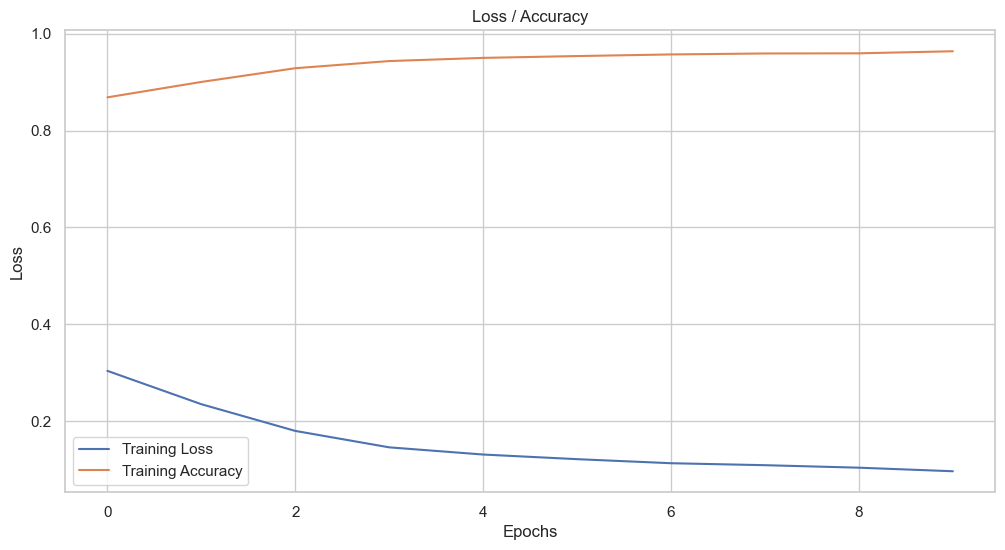

In [60]:
#Plot Loss Curves
plt.figure(figsize = (12, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.title('Loss / Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred) # might not work

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
# print("Recall:", recall)
print("AUC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))